In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
flightsdf = pd.read_csv('flights.csv')

    

canceled_flights = flightsdf[(flightsdf['dep_delay'].isna())&(flightsdf['arr_delay'].isna())]

print(canceled_flights)

print(flightsdf)

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
838     2013      1    1       NaN            1630        NaN       NaN   
839     2013      1    1       NaN            1935        NaN       NaN   
840     2013      1    1       NaN            1500        NaN       NaN   
841     2013      1    1       NaN             600        NaN       NaN   
1777    2013      1    2       NaN            1540        NaN       NaN   
...      ...    ...  ...       ...             ...        ...       ...   
336771  2013      9   30       NaN            1455        NaN       NaN   
336772  2013      9   30       NaN            2200        NaN       NaN   
336773  2013      9   30       NaN            1210        NaN       NaN   
336774  2013      9   30       NaN            1159        NaN       NaN   
336775  2013      9   30       NaN             840        NaN       NaN   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
838               1815    

In [2]:
def flight_canceled(flightsdfrow):
    if pd.isnull(flightsdfrow['dep_delay']) and pd.isnull(flightsdfrow['arr_delay']):
        return 1
    else:
        return 0
    
flightsdf['canceled_flights'] = flightsdf.apply(flight_canceled, axis=1)
print(flightsdf)
print(flightsdf['canceled_flights'].value_counts())

        year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0       2013      1    1     517.0             515        2.0     830.0   
1       2013      1    1     533.0             529        4.0     850.0   
2       2013      1    1     542.0             540        2.0     923.0   
3       2013      1    1     544.0             545       -1.0    1004.0   
4       2013      1    1     554.0             600       -6.0     812.0   
...      ...    ...  ...       ...             ...        ...       ...   
336771  2013      9   30       NaN            1455        NaN       NaN   
336772  2013      9   30       NaN            2200        NaN       NaN   
336773  2013      9   30       NaN            1210        NaN       NaN   
336774  2013      9   30       NaN            1159        NaN       NaN   
336775  2013      9   30       NaN             840        NaN       NaN   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
0                  819    

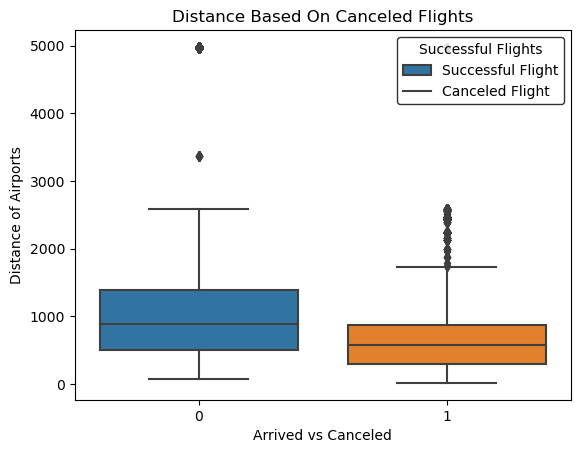

In [3]:
sns.boxplot(x='canceled_flights', y='distance',data=flightsdf)

plt.xlabel('Arrived vs Canceled')
plt.ylabel('Distance of Airports')
plt.title('Distance Based On Canceled Flights')

labels = {0 : 'Successful Flight', 1: 'Canceled Flight'}
plt.legend(title='Successful Flights', labels=[labels[0], labels[1]],loc='upper right', edgecolor='black')
plt.show()

In [4]:
distance_ports = flightsdf.groupby('canceled_flights')['distance'].mean()
distance_ports


canceled_flights
0    1048.570600
1     695.353725
Name: distance, dtype: float64

In [5]:
flightsdf.pivot_table(index=['month'], aggfunc='count')

,air_time,arr_delay,arr_time,canceled_flights,carrier,day,dep_delay,dep_time,dest,distance,flight,hour,minute,origin,sched_arr_time,sched_dep_time,tailnum,time_hour,year
month,,,,,,,,,,,,,,,,,,,
1,26398,26398,26468,27004,27004,27004,26483,26483,27004,27004,27004,27004,27004,27004,27004,27004,26849,27004,27004
2,23611,23611,23660,24951,24951,24951,23690,23690,24951,24951,24951,24951,24951,24951,24951,24951,24505,24951,24951
3,27902,27902,27943,28834,28834,28834,27973,27973,28834,28834,28834,28834,28834,28834,28834,28834,28594,28834,28834
4,27564,27564,27620,28330,28330,28330,27662,27662,28330,28330,28330,28330,28330,28330,28330,28330,28122,28330,28330
5,28128,28128,28195,28796,28796,28796,28233,28233,28796,28796,28796,28796,28796,28796,28796,28796,28632,28796,28796
6,27075,27075,27171,28243,28243,28243,27234,27234,28243,28243,28243,28243,28243,28243,28243,28243,27935,28243,28243
7,28293,28293,28382,29425,29425,29425,28485,28485,29425,29425,29425,29425,29425,29425,29425,29425,29144,29425,29425
8,28756,28756,28821,29327,29327,29327,28841,28841,29327,29327,29327,29327,29327,29327,29327,29327,29188,29327,29327
9,27010,27010,27070,27574,27574,27574,27122,27122,27574,27574,27574,27574,27574,27574,27574,27574,27428,27574,27574


In [6]:
monthtostring = {1:'January',2:'February',3:'March',
                4:'April',5:'May',6:'June',
                7:'July',8:'August',9:'September',
                10:'October',11:'November',12:'December'}
flightsdf['month'] = flightsdf['month'].apply(lambda monthconvert: monthtostring[monthconvert] )
#flightsdf.pivot_table(index=['month'], aggfunc='count')


In [7]:
monthflights = flightsdf.copy()
monthflights.drop(['year','day','dep_time','sched_dep_time','dep_delay','arr_time','sched_arr_time'], axis=1, inplace=True)
monthflights.drop(['arr_delay', 'carrier', 'flight','tailnum', 'origin','dest'], axis=1, inplace=True)
monthflights.drop(['air_time','distance','hour','minute','time_hour'], axis=1, inplace=True)
monthflights

#flighttable= monthflights.pivot_table(index=['month'], aggfunc='count')

#flighttable.plot(kind='bar')
#plt.show()




,month,canceled_flights
0,January,0
1,January,0
2,January,0
3,January,0
4,January,0
...,...,...
336771,September,1
336772,September,1
336773,September,1
336774,September,1


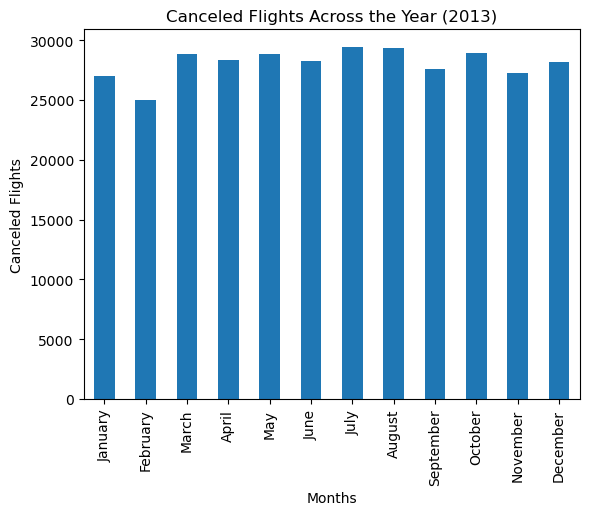

In [8]:
months_set = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthflights['month'] = pd.Categorical(monthflights['month'], categories=months_set, ordered=True)
flighttable= monthflights.pivot_table(index=['month'], aggfunc='count')

flighttable.plot(kind='bar', legend=False)
plt.title('Canceled Flights Across the Year (2013)')
plt.xlabel('Months')
plt.ylabel('Canceled Flights')
plt.show()

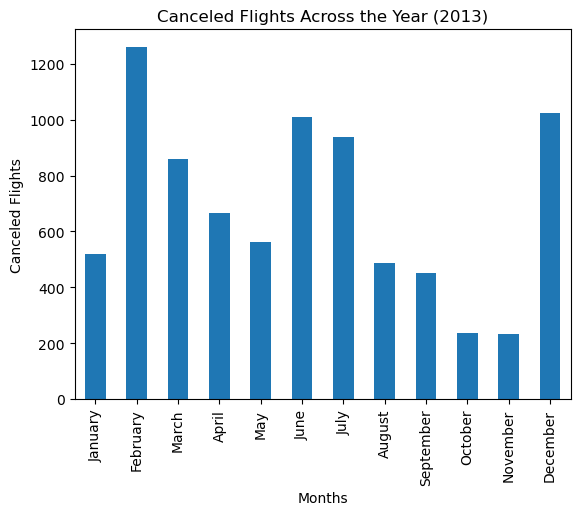

In [9]:
months_placed = ['January','February','March','April','May','June','July','August','September','October','November','December']
flightsdf['month'] = pd.Categorical(flightsdf['month'], categories=months_placed , ordered=True)
month_cancel = flightsdf.groupby('month')['canceled_flights'].sum()

#month_cancel
month_cancel.plot(kind='bar')
plt.title('Canceled Flights Across the Year (2013)')
plt.xlabel('Months')
plt.ylabel('Canceled Flights')


#plt.ylim(0, 40000)
plt.show()

Text(0, 0.5, 'Canceled Flights(%)')

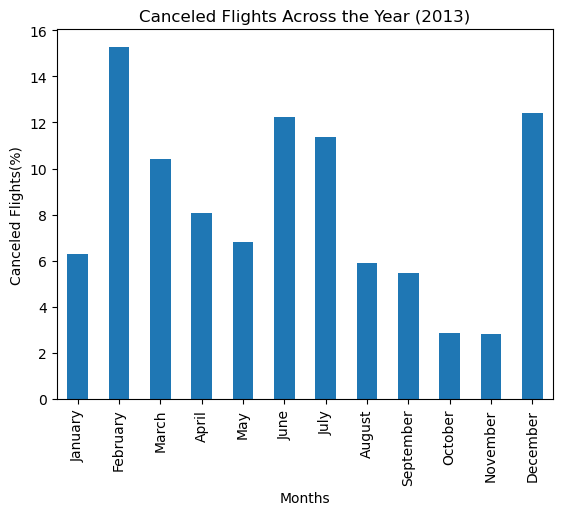

In [10]:
#month_cancel = flightsdf.groupby('month')['canceled_flights'].count()
#canceled_total = flightsdf['canceled_flights'].count()
#canceled_graph_val = (month_cancel / canceled_total) * 100

month_cancel = flightsdf.groupby('month')['canceled_flights'].sum()
month_filed = flightsdf['canceled_flights'].sum()

canceled_graph = (month_cancel / month_filed) * 100

canceled_graph.plot(kind='bar')
plt.title('Canceled Flights Across the Year (2013)')
plt.xlabel('Months')
plt.ylabel('Canceled Flights(%)')



In [11]:
avg_distance_per_daydf = flightsdf.groupby('day')['distance'].mean()


avg_distance_per_daydf

avg_distance_per_daydf.min()

1031.0738621357514

In [12]:
std_distance_per_daydf = flightsdf.groupby('day')['distance'].std()
std_distance_per_daydf

#std_distance_per_daydf.max()

day
1     732.042200
2     734.788311
3     733.294868
4     733.364723
5     733.549246
6     735.877529
7     735.311172
8     731.932316
9     734.881800
10    732.616855
11    732.790345
12    732.035371
13    736.126601
14    733.803169
15    730.824701
16    734.621740
17    731.800723
18    732.778041
19    732.029589
20    735.603765
21    733.660527
22    731.315289
23    734.244529
24    732.311075
25    732.203282
26    732.767641
27    733.401027
28    731.184496
29    731.753334
30    733.145744
31    735.898432
Name: distance, dtype: float64

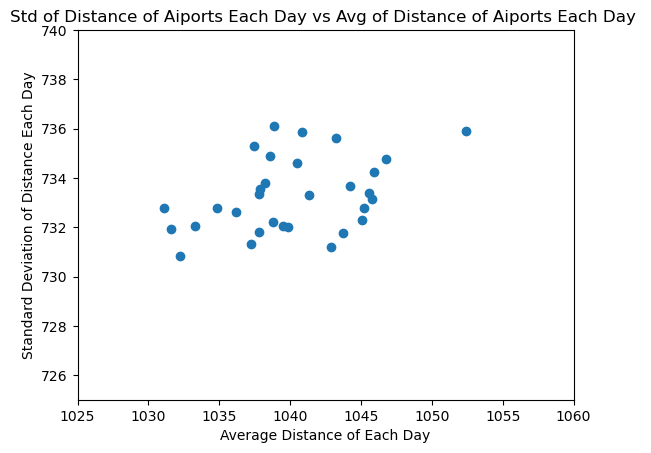

In [13]:
x=avg_distance_per_daydf
y=std_distance_per_daydf 
plt.scatter(x, y)
plt.title('Std of Distance of Aiports Each Day vs Avg of Distance of Aiports Each Day ')
plt.xlabel('Average Distance of Each Day')
plt.ylabel('Standard Deviation of Distance Each Day')

plt.xlim(1025, 1060)
plt.ylim(725, 740)
plt.show()